# Aufgabe 34 Likelihoodkurve

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [54]:
# matplotlib Einstellungen
import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (7,5)
%config InlineBackend.figure_formats = ['svg']

## a)

In [55]:
k = [13,8,9]

In [56]:
# negative Log-Likelihood
def F(lam, k):
    return len(k)*lam - np.log(lam)*np.sum(k) + np.sum(np.log([math.factorial(k_i) for k_i in k]))

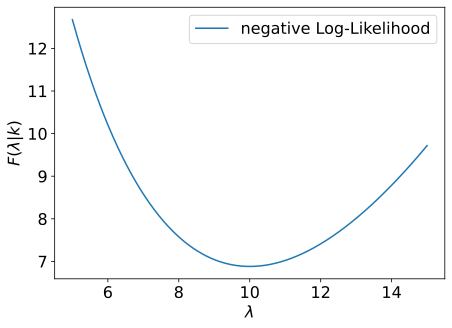

In [69]:
# plotten
lam = np.linspace(5,15, 10000)
plt.plot(lam, F(lam, k), label='negative Log-Likelihood')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$F(\lambda | k)$')
plt.legend()
plt.show()

## c)

In [58]:
c = [1/2, 2, 9/2]

In [59]:
from scipy.optimize import root

In [73]:
lam0 = 10

In [111]:
lam_left = []
lam_right = []
for c_i in c:
    res = root(lambda x: F(x,k) - F(lam0,k) - c_i, x0=[lam0-3,lam0+3])
    lam_left.append(res.x[0])
    lam_right.append(res.x[1])
    
lam_left, lam_right

([8.283637152763632, 6.778764881298204, 5.473703487761548],
 [11.938502808629918, 14.108809953003432, 16.51966237607044])

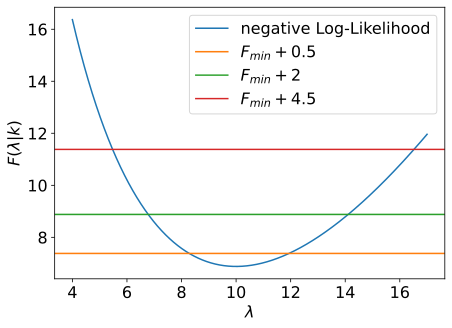

In [108]:
# plotten
lam = np.linspace(4,17, 10000)
plt.plot(lam, F(lam, k), label='negative Log-Likelihood')

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors.pop(0)
for c_i,color in zip(c,colors):
    plt.axhline(F(lam0,k)+c_i, color=color, label=r'$F_{min}'+f' + {c_i}$')
    
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$F(\lambda | k)$')
plt.legend()
plt.show()

### Was sagen diese $\lambda$ Werte aus?

die $n \sigma$ Umgebungen von $\hat{\lambda}$

## d)

In [119]:
def F_Taylor(lam,k, lam0):
    a = np.sum(k) # alpha
    N = len(k)
    return F(lam0,k) + (N-a/lam0)*(lam-lam0) + 1/2*a/lam0**2*(lam-lam0)**2

In [116]:
def lam1(k,lam0,c):
    a = np.sum(k) # alpha
    N = len(k)
    return -(lam0**2*N/a - 2*lam0) + np.sqrt( (lam0**2*N/a - 2*lam0)**2 +2*lam0**3/a*(N-a/lam0) - lam0**2 + 2*lam0**2/a*c )

def lam2(k,lam0,c):
    a = np.sum(k) # alpha
    N = len(k)
    return -(lam0**2*N/a - 2*lam0) - np.sqrt( (lam0**2*N/a - 2*lam0)**2 +2*lam0**3/a*(N-a/lam0) - lam0**2 + 2*lam0**2/a*c )

In [117]:
lam_left2 = []
lam_right2 = []
for c_i in c:
    lam_left2.append(lam2(k,lam0,c_i))
    lam_right2.append(lam1(k,lam0,c_i))

In [118]:
lam_left2, lam_right2

([8.174258141649446, 6.348516283298892, 4.522774424948339],
 [11.825741858350554, 13.651483716701108, 15.477225575051662])

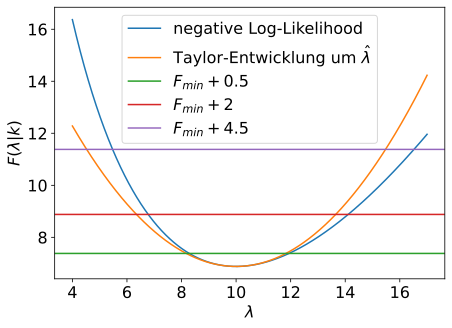

In [124]:
# plotten
lam = np.linspace(4,17, 10000)
plt.plot(lam, F(lam, k), label='negative Log-Likelihood')
plt.plot(lam, F_Taylor(lam, k, lam0), label=r'Taylor-Entwicklung um $\hat{\lambda}$')

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors.pop(0)
colors.pop(0)
for c_i,color in zip(c,colors):
    plt.axhline(F(lam0,k)+c_i, color=color, label=r'$F_{min}'+f' + {c_i}$')
    
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$F(\lambda | k)$')
plt.legend()
plt.show()
